In [30]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("PGM_Assignment3.xlsx", header=None)

In [3]:
labels = data[7]

In [4]:
unique, counts = np.unique(labels, return_counts=True)

In [5]:
dict(zip(unique, counts))

{1: 70, 2: 70, 3: 70}

In [6]:
num_train = 56
num_test = 14

In [7]:
class1 = data.loc[data[7] == 1]
class1_train = class1[:num_train]
class1_test = class1[num_train:]
class1 = np.array(class1)
class1_train = np.array(class1_train)
class1_test = np.array(class1_test)

class2 = data.loc[data[7] == 2]
class2_train = class2[:num_train]
class2_test = class2[num_train:]
class2 = np.array(class2)
class2_train = np.array(class2_train)
class2_test = np.array(class2_test)

class3 = data.loc[data[7] == 3]
class3_train = class3[:num_train]
class3_test = class3[num_train:]
class3 = np.array(class3)
class3_train = np.array(class3_train)
class3_test = np.array(class3_test)

In [8]:
mean1 = class1_train.mean(axis=0)
std1 = class1_train.std(axis=0)

In [9]:
mean2 = class2_train.mean(axis=0)
std2 = class2_train.std(axis=0)

In [10]:
mean3 = class3_train.mean(axis=0)
std3 = class3_train.std(axis=0)

In [11]:
prob1bin = 0.5
prob2bin = 0.5

prob1 = 0.33
prob2 = 0.33
prob3 = 0.33

In [12]:
def classifybin(arr, label):
    preds = []
    for dpt in arr:
        p1 = prob1bin
        for i in range(len(dpt)):
            if i == 7:
                assert std1[i] == 0
                break
            p1 *= norm.pdf(dpt[i], mean1[i], std1[i])

        p2 = prob2bin
        for i in range(len(dpt)):
            if i == 7:
                break
            p2 *= norm.pdf(dpt[i], mean2[i], std2[i])

        classlabel = np.argmax([p1, p2]) + 1
        preds.append(classlabel)
    
    return preds

In [19]:
def classifytri(arr, label):
    preds = []
    for dpt in arr:
        p1 = prob1
        for i in range(len(dpt)):
            if i == 7:
                break
            p1 *= norm.pdf(dpt[i], mean1[i], std1[i])

        p2 = prob2
        for i in range(len(dpt)):
            if i == 7:
                break
            p2 *= norm.pdf(dpt[i], mean2[i], std2[i])

        p3 = prob3
        for i in range(len(dpt)):
            if i == 7:
                break
            p3 *= norm.pdf(dpt[i], mean3[i], std3[i])

        classlabel = np.argmax([p1, p2, p3]) + 1
        preds.append(classlabel)

    return preds

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Binary Classification

Accuracy = 0.8214285714285714

              precision    recall  f1-score   support

           1       1.00      0.74      0.85        19
           2       0.64      1.00      0.78         9

    accuracy                           0.82        28
   macro avg       0.82      0.87      0.82        28
weighted avg       0.89      0.82      0.83        28



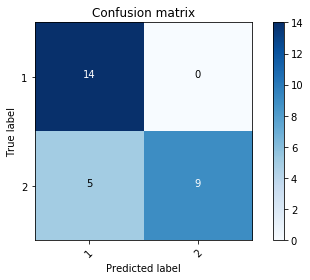

In [34]:
preds = classifybin(class1_test, 1)
preds2 = classifybin(class2_test, 2)
preds.extend(preds2)
actual = [1]*len(class1_test)
actual.extend([2]*len(class2_test))
print("Accuracy =", accuracy_score(preds, actual))
print()
print(classification_report(preds, actual))

cnf_matrix = confusion_matrix(actual, preds, labels=[1, 2])

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1, 2])

# Tri-class Classification

Accuracy = 0.6904761904761905

              precision    recall  f1-score   support

           1       0.71      0.53      0.61        19
           2       0.64      1.00      0.78         9
           3       0.71      0.71      0.71        14

    accuracy                           0.69        42
   macro avg       0.69      0.75      0.70        42
weighted avg       0.70      0.69      0.68        42



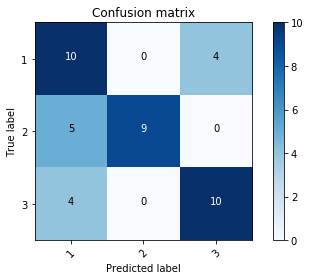

In [39]:
preds = classifytri(class1_test, 1)
preds2 = classifytri(class2_test, 2)
preds3 = classifytri(class3_test, 3)
preds.extend(preds2)
preds.extend(preds3)
actual = [1]*len(class1_test)
actual.extend([2]*len(class2_test))
actual.extend([3]*len(class3_test))
print("Accuracy =", accuracy_score(preds, actual))
print()
print(classification_report(preds, actual))

cnf_matrix = confusion_matrix(actual, preds, labels=[1, 2, 3])

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1, 2, 3])